In [ ]:
import pandas as pd
import numpy as np
from functions import player_stats

In [114]:
data = pd.read_csv("../data/full_data/2026_LoL_esports_match_data_from_OraclesElixir.csv")

data.head(5)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT05_171038,complete,NaN,LIT,2026,Winter,0,2026-01-08 17:08:27,1,16.01,...,192.0,-1103.0,-560.0,-28.0,6.0,1.0,4.0,7.0,4.0,4.0
1,LOLTMNT05_171038,complete,NaN,LIT,2026,Winter,0,2026-01-08 17:08:27,1,16.01,...,194.0,-586.0,-1672.0,-34.0,4.0,2.0,5.0,4.0,2.0,3.0
2,LOLTMNT05_171038,complete,NaN,LIT,2026,Winter,0,2026-01-08 17:08:27,1,16.01,...,221.0,-333.0,-807.0,-8.0,1.0,4.0,4.0,5.0,3.0,5.0
3,LOLTMNT05_171038,complete,NaN,LIT,2026,Winter,0,2026-01-08 17:08:27,1,16.01,...,194.0,2641.0,1926.0,38.0,8.0,3.0,4.0,4.0,6.0,4.0
4,LOLTMNT05_171038,complete,NaN,LIT,2026,Winter,0,2026-01-08 17:08:27,1,16.01,...,23.0,1136.0,100.0,3.0,1.0,12.0,3.0,0.0,11.0,4.0


In [115]:
for column in data.columns:
    print(column)

gameid
datacompleteness
url
league
year
split
playoffs
date
game
patch
participantid
side
position
playername
playerid
teamname
teamid
firstPick
champion
ban1
ban2
ban3
ban4
ban5
pick1
pick2
pick3
pick4
pick5
gamelength
result
kills
deaths
assists
teamkills
teamdeaths
doublekills
triplekills
quadrakills
pentakills
firstblood
firstbloodkill
firstbloodassist
firstbloodvictim
team kpm
ckpm
firstdragon
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
chemtechs
hextechs
dragons (type unknown)
elders
opp_elders
firstherald
heralds
opp_heralds
void_grubs
opp_void_grubs
firstbaron
barons
opp_barons
atakhans
opp_atakhans
firsttower
towers
opp_towers
firstmidtower
firsttothreetowers
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
damagetotowers
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent

In [116]:
# Pegando os nomes dos times
data[data["league"] == "CBLOL"]["teamname"].unique()

array(['Vivo Keyd Stars', 'paiN Gaming', 'RED Canids', 'Fluxo W7M',
       'LOUD', 'FURIA', 'LØS', 'Leviatan'], dtype=object)

In [117]:
data_pain = data[data["teamname"] == "paiN Gaming"]

In [118]:
data_pain["playername"].unique()

array(['Robo', 'CarioK', 'tinowns', 'Marvin', 'Kuri', nan, 'Trigger'],
      dtype=object)

In [121]:
colunas_desempenho_por_tempo = ['league','playername','position', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'goldat15', 'xpat15', 'csat15','golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',  'assistsat15',  'deathsat15','goldat20', 'xpat20', 'csat20', 'golddiffat20','xpdiffat20', 'csdiffat20', 'killsat20', 'assistsat20', 'deathsat20','goldat25', 'xpat25', 'csat25','golddiffat25', 'xpdiffat25', 'csdiffat25', 'killsat25', 'assistsat25', 'deathsat25']

In [122]:
# Criando a função de mediana para 1 jogador
# Talvez seja ideal criar uma função de comparação e englobar ela dentro do arquivo functions.py
# Essa função está super resumida, será que posso otimizar a player_stats com base nela?

tinowns_data = data_pain[colunas_desempenho_por_tempo][data_pain[colunas_desempenho_por_tempo]["playername"]=="tinowns"]

for column in tinowns_data.columns:
    if column in ['league','playername','position']:
        print(f'{column}: {tinowns_data[column].unique()}\n')
    else:
        print(f'{column}_median: {round(tinowns_data[column].median(),2)}\n')

league: ['CBLOL']

playername: ['tinowns']

position: ['mid']

goldat10_median: 3534.5

xpat10_median: 4944.0

csat10_median: 91.5

golddiffat10_median: -8.0

xpdiffat10_median: -112.5

csdiffat10_median: -5.0

killsat10_median: 0.0

assistsat10_median: 0.0

deathsat10_median: 0.0

goldat15_median: 5332.0

xpat15_median: 7603.5

csat15_median: 139.0

golddiffat15_median: -449.5

xpdiffat15_median: -168.0

csdiffat15_median: -11.0

killsat15_median: 1.0

assistsat15_median: 1.0

deathsat15_median: 1.0

goldat20_median: 7295.5

xpat20_median: 10113.0

csat20_median: 182.5

golddiffat20_median: -865.5

xpdiffat20_median: -909.0

csdiffat20_median: -23.0

killsat20_median: 1.0

assistsat20_median: 1.0

deathsat20_median: 1.0

goldat25_median: 9352.0

xpat25_median: 12766.0

csat25_median: 223.0

golddiffat25_median: -1044.5

xpdiffat25_median: -1245.0

csdiffat25_median: -32.0

killsat25_median: 2.0

assistsat25_median: 2.0

deathsat25_median: 2.0



In [123]:
# Criando uma célula para dados base do CBLOL
# Sempre rodar essa célula quando houver necessidade de retomar os dados base, sem modificações na fonte
cblol_data = data[data["league"] == "CBLOL"]
cblol_mid_data = cblol_data[cblol_data["position"] == "mid"]
cblol_mid_data = cblol_mid_data[colunas_desempenho_por_tempo]

In [124]:
# Copiando por cima do DF original
# Importante rodar a célula acima para retomar os dados base
cblol_mid_data = cblol_mid_data.drop(["league", "position"], axis=1)

In [125]:
base_visual = cblol_mid_data.groupby(["playername"]).mean().round().reset_index()

In [126]:
import matplotlib.pyplot as plt

In [127]:
base_visual

,playername,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,...,deathsat20,goldat25,xpat25,csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25
0,enga,3791.0,5219.0,99.0,260.0,135.0,2.0,1.0,0.0,0.0,...,1.0,9792.0,13870.0,243.0,35.0,559.0,-1.0,2.0,3.0,1.0
1,feisty,3625.0,5142.0,99.0,26.0,137.0,4.0,0.0,1.0,0.0,...,1.0,10323.0,13373.0,246.0,1143.0,-4.0,12.0,2.0,3.0,1.0
2,hauz,3568.0,5050.0,94.0,-288.0,-84.0,-6.0,0.0,0.0,0.0,...,1.0,9582.0,13897.0,248.0,-590.0,308.0,3.0,2.0,2.0,1.0
3,kaze,3741.0,5064.0,97.0,196.0,29.0,3.0,1.0,1.0,0.0,...,1.0,10455.0,13470.0,237.0,1086.0,488.0,2.0,4.0,5.0,2.0
4,mago,3376.0,4771.0,91.0,-492.0,-429.0,-3.0,0.0,0.0,1.0,...,2.0,9144.0,13616.0,246.0,-1421.0,-790.0,-2.0,1.0,2.0,3.0
5,mireu,3780.0,5130.0,101.0,209.0,117.0,6.0,0.0,0.0,0.0,...,1.0,10494.0,13934.0,266.0,838.0,381.0,24.0,1.0,4.0,2.0
6,tinowns,3560.0,5024.0,93.0,-131.0,-81.0,-5.0,0.0,1.0,0.0,...,2.0,9327.0,13054.0,225.0,-1043.0,-886.0,-24.0,2.0,3.0,2.0
7,tutsz,3722.0,5251.0,100.0,120.0,113.0,2.0,0.0,0.0,0.0,...,1.0,10250.0,14151.0,255.0,775.0,100.0,0.0,2.0,3.0,1.0


In [128]:
kda_columns = ["playername","killsat10","killsat15","killsat20","killsat25","assistsat10","assistsat15","assistsat20","assistsat25","deathsat10","deathsat15","deathsat20","deathsat25"]

In [129]:
base_visual_kda = base_visual[kda_columns]

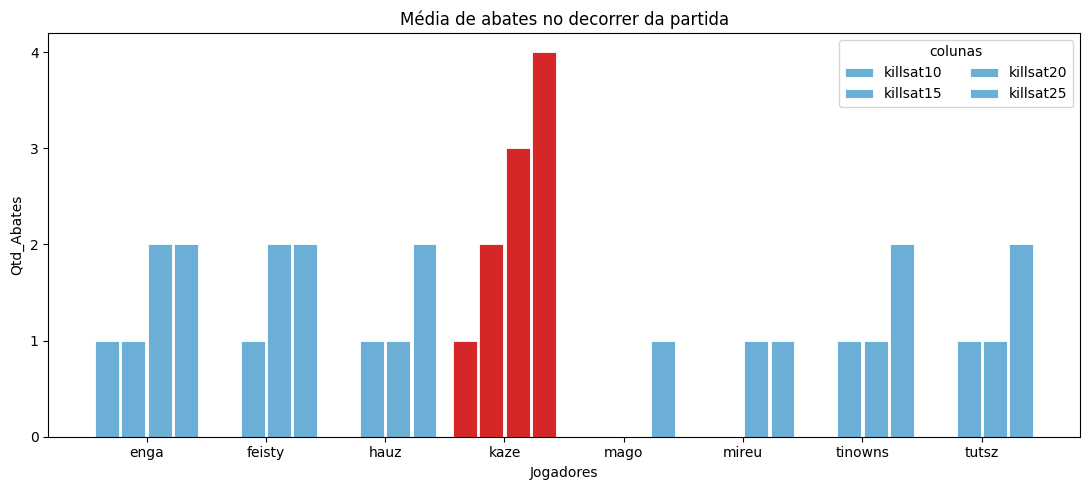

In [130]:
# Fazendo o gráfico
x = np.arange(len(base_visual.index))       # posição dos 8 indices do eixo x
n_series = (base_visual_kda.shape[1]-1)/3   # número de colunas por item no eixo x (4) 
bar_width = 0.2                             # largura de cada barra
gap = 0.02                                  # pequeno espaço entre barras
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(11,5))

cmap_default = plt.cm.tab20c
cmap_special = plt.cm.tab10

special_label = "kaze"

group_colors = []
for i, label in enumerate(base_visual_kda["playername"]):
    if label == special_label:
        group_colors.append(cmap_special(3))
    else:
        group_colors.append(cmap_default(1))

for j, col in enumerate(base_visual_kda.columns[1:5]):
    # deslocamento de cada série dentro do grupo
    offset = (j - (n_series - 1)/2) * (bar_width + gap)
    ax.bar(x + offset, base_visual_kda[col].values,
           width=bar_width,
           label=col,
           color = group_colors,
           edgecolor='white',
           linewidth=0.6
        )

ax.set_xticks(x)
ax.set_xticklabels(base_visual_kda["playername"], rotation=0)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel("Jogadores")
ax.set_ylabel("Qtd_Abates")
ax.set_title("Média de abates no decorrer da partida")
ax.legend(title="colunas", ncol=2)

plt.tight_layout()
plt.show()

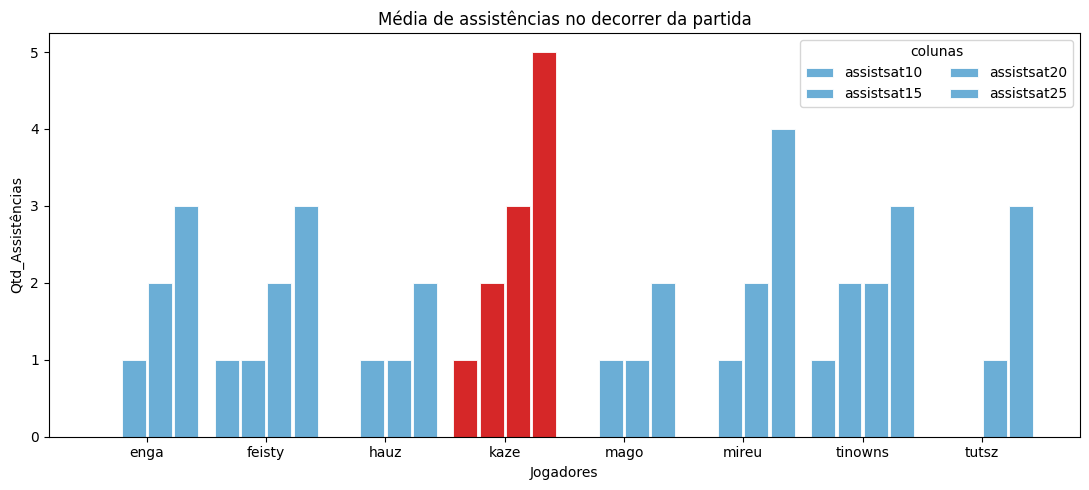

In [131]:
# Fazendo o gráfico
x = np.arange(len(base_visual.index))       # posição dos 8 indices do eixo x
n_series = (base_visual_kda.shape[1]-1)/3   # número de colunas por item no eixo x (4) 
bar_width = 0.2                             # largura de cada barra
gap = 0.02                                  # pequeno espaço entre barras
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(11,5))

cmap_default = plt.cm.tab20c
cmap_special = plt.cm.tab10

special_label = "kaze"

group_colors = []
for i, label in enumerate(base_visual_kda["playername"]):
    if label == special_label:
        group_colors.append(cmap_special(3))
    else:
        group_colors.append(cmap_default(1))

for j, col in enumerate(base_visual_kda.columns[5:9]):
    # deslocamento de cada série dentro do grupo
    offset = (j - (n_series - 1)/2) * (bar_width + gap)
    ax.bar(x + offset, base_visual_kda[col].values,
           width=bar_width,
           label=col,
           color = group_colors,
           edgecolor='white',
           linewidth=0.6
        )

ax.set_xticks(x)
ax.set_xticklabels(base_visual_kda["playername"], rotation=0)
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_xlabel("Jogadores")
ax.set_ylabel("Qtd_Assistências")
ax.set_title("Média de assistências no decorrer da partida")
ax.legend(title="colunas", ncol=2)

plt.tight_layout()
plt.show()

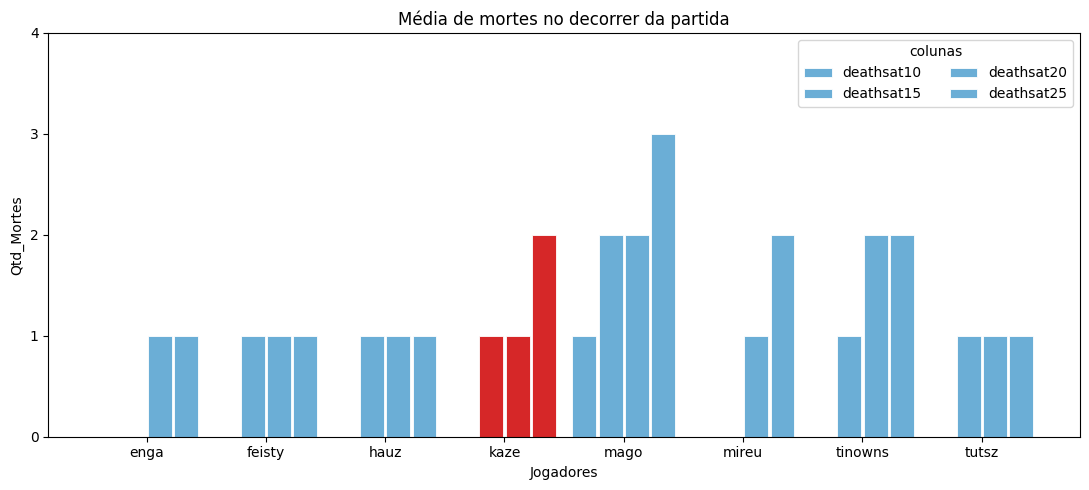

In [132]:
# Fazendo o gráfico
x = np.arange(len(base_visual.index))       # posição dos 8 indices do eixo x
n_series = (base_visual_kda.shape[1]-1)/3   # número de colunas por item no eixo x (4) 
bar_width = 0.2                             # largura de cada barra
gap = 0.02                                  # pequeno espaço entre barras
colors = plt.cm.tab10.colors
fig, ax = plt.subplots(figsize=(11,5))

cmap_default = plt.cm.tab20c
cmap_special = plt.cm.tab10

special_label = "kaze"

group_colors = []
for i, label in enumerate(base_visual_kda["playername"]):
    if label == special_label:
        group_colors.append(cmap_special(3))
    else:
        group_colors.append(cmap_default(1))

for j, col in enumerate(base_visual_kda.columns[9:13]):
    # deslocamento de cada série dentro do grupo
    offset = (j - (n_series - 1)/2) * (bar_width + gap)
    ax.bar(x + offset, base_visual_kda[col].values,
           width=bar_width,
           label=col,
           color = group_colors,
           edgecolor='white',
           linewidth=0.6
        )

ax.set_xticks(x)
ax.set_xticklabels(base_visual_kda["playername"], rotation=0)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel("Jogadores")
ax.set_ylabel("Qtd_Mortes")
ax.set_title("Média de mortes no decorrer da partida")
ax.legend(title="colunas", ncol=2)

plt.tight_layout()
plt.show()

In [133]:
cblol_data[cblol_data["playername"] == "tatu"]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
1890,LOLTMNT03_337829,complete,NaN,CBLOL,2026,NaN,0,2026-01-17 18:27:20,1,16.01,...,179.0,5481.0,3839.0,44.0,6.0,9.0,0.0,1.0,1.0,5.0
1938,LOLTMNT03_337847,complete,NaN,CBLOL,2026,NaN,0,2026-01-17 20:16:54,1,16.01,...,189.0,1302.0,2596.0,24.0,1.0,5.0,0.0,1.0,2.0,2.0
2166,LOLTMNT03_337968,complete,NaN,CBLOL,2026,NaN,0,2026-01-18 17:04:31,1,16.01,...,163.0,1896.0,2980.0,28.0,3.0,8.0,1.0,2.0,3.0,3.0
4638,LOLTMNT01_324588,complete,NaN,CBLOL,2026,NaN,0,2026-01-24 17:01:45,1,16.02,...,186.0,-148.0,-691.0,7.0,0.0,3.0,2.0,0.0,8.0,1.0
5094,LOLTMNT01_324952,complete,NaN,CBLOL,2026,NaN,0,2026-01-25 20:11:14,1,16.02,...,202.0,238.0,313.0,18.0,0.0,1.0,0.0,1.0,1.0,0.0
8089,LOLTMNT01_334569,complete,NaN,CBLOL,2026,NaN,0,2026-01-31 17:02:39,1,16.02,...,199.0,1302.0,1567.0,11.0,4.0,2.0,0.0,1.0,1.0,1.0
8814,LOLTMNT01_336190,complete,NaN,CBLOL,2026,NaN,0,2026-02-01 17:04:08,1,16.02,...,170.0,1897.0,733.0,7.0,3.0,7.0,0.0,0.0,1.0,3.0
